In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.optimize import curve_fit

What students need to do:
 - [ ] Import the data
 - [ ] Plot all the datafiles
 - [ ] Create fit function
 - [ ] Fit each dataset to the relevant fit function
 - [ ] Extract the centers and store them where we care
 - [ ] For comparison, also store the centers with no fitting
 - [ ] Fit the centers to the model to extract sizes
 - [ ] Compare fit vs no fit

Teacher voice

We're going to first work with one data set. Once we have a workflow that works, you'll gather up the steps and repeat them for all the datasets. At the end, you'll perform some analysis on the combined data sets.


# Importing one data file

Your datafile should be in a folder titled "UV-Vis Data" or similar. Pick one filename, and use np.loadtxt() to import that data file. Something about paths. Something about skiprows and maxrows and unpack. Plot your data so that you are sure you have the right thing.

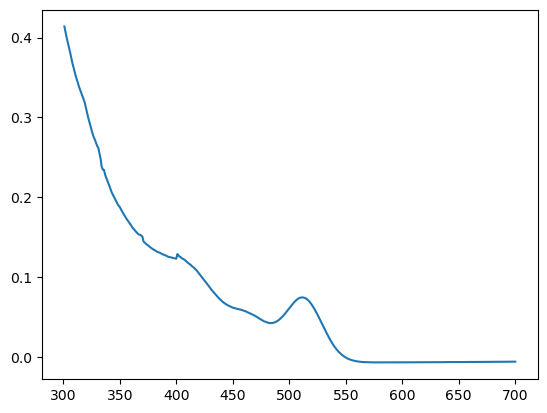

In [59]:
xdata, ydata = np.loadtxt("UV-Vis Data/120s031320.txt", skiprows = 19, max_rows = 400, unpack = True)
plt.plot(xdata, ydata)

We need the location of the clear smallish peak somewhere around 500nm. One way to do that would be to find the local max there.

In [63]:
peakmax = np.max(ydata)
print(peakmax)

0.41387


There's two problems there. Firstly, we care about the location of the maximum, not the heigh of the max. Secondly, we want the local max. To solve the first, something something explain argmax. To solve the second, let's trim our data until our peak is the tallest part of the dataset.

 The peak is at 511.0


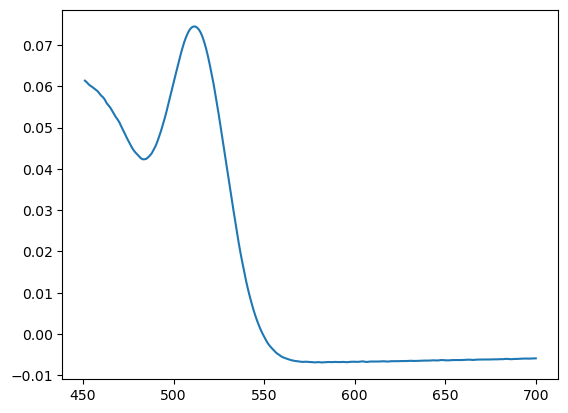

In [67]:
i = 0
f = 250
plt.plot(xdata[i:f], ydata[i:f])
loc = np.argmax(ydata[i:f])
print(f" The peak is at {xdata[loc]}")

Alright we have a peak location. Now let's go back to the whole dataset and consider fitting. Our data has, trust me on this, four peaks. I do want to know why but that's beyond the scope of this idea. Let's define a gaussian funcion, and then a function that does four gaussians.

## Definiting fit functions

In [36]:
def twogauss(x, h1, h2, c1, c2, s1, s2, b):
    """ Returns multiple Gaussians summed on the x axis.
    heights, centers, stdevs should be 1xn arrays.
    Gaussians are of the form
    y = height * np.exp((center - x)**2/(2*stdev**2))
    b is a vertical offset"""
    g1 = gauss(x, h1, c1, s1)
    g2 = gauss(x, h2, c2, s2)
    return g1 + g2 + b

def fourgauss(x, h1, h2, h3, h4, c1, c2, c3, c4, s1, s2, s3, s4, b):
    """Returns many Gaussians summed on the x axis.
    """
    g1 = gauss(x, h1, c1, s1)
    g2 = gauss(x, h2, c2, s2)
    g3 = gauss(x, h3, c3, s3)
    g4 = gauss(x, h4, c4, s4)
    return g1 + g2 + g3 + g4 + b
    
def gauss(x, height, center, stdev):
    return height*np.exp(-(center-x)**2/(2*stdev**2))

# Fitting the first dataset

Alright lets plot our data, make an initial guess, and then fit it.

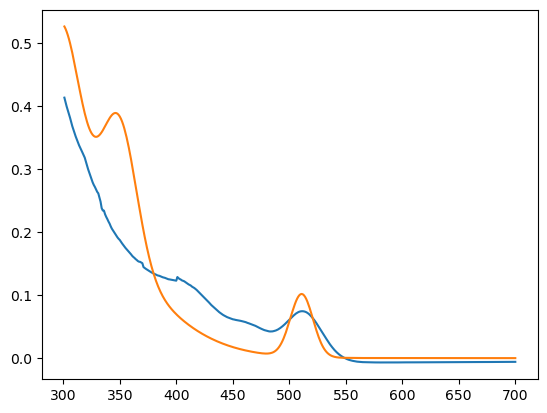

In [73]:
plt.plot(xdata, ydata)
hs = (.4, .2, .2, .1)
cs = (250, 300, 350, 511)
ss = (80, 15, 15, 10)
b = 0
plt.plot(xdata, fourgauss(xdata, *hs, *cs, *ss, b))

In [74]:
popt, pcov = curve_fit(fourgauss, xdata, ydata, p0=(*hs, *cs, *ss, b))

centers located at 372.73794648214255


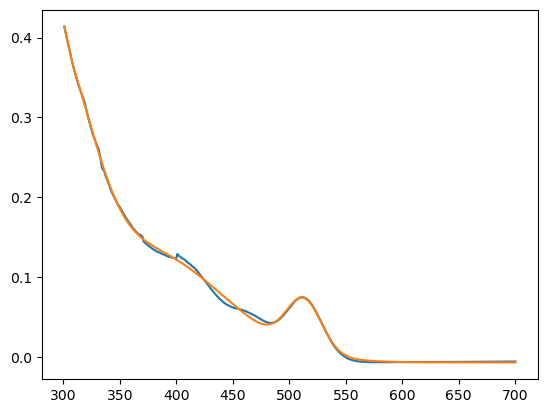

In [79]:
print(f"centers located at {popt[4]}")
plt.plot(xdata, ydata)
plt.plot(xdata, fourgauss(xdata, *popt))

## Importing data

opening 120s031320.txt
opening 150s031320.txt
opening 180s031320.txt
opening 20s031320.txt
opening 30s031320.txt
opening 40s031320.txt
opening 50s031320.txt
opening 60s031320.txt
opening 90s031320.txt
opening long031320.txt


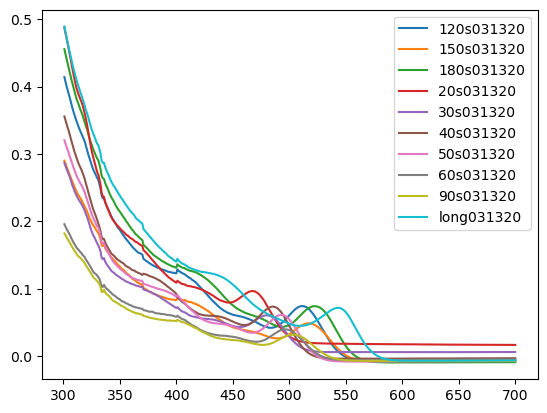

In [4]:
p = Path("UV-Vis Data")
filelist = list(p.glob('*.txt'))

textnames = np.array([])
uvvisX = np.empty([400,1])
uvvisY = np.empty([400,1])
for i in filelist:
    print("opening " + i.name)
    textnames = np.append(textnames, i.stem)
    filename=p/i.name
    datax, datay = np.loadtxt(filename, skiprows=19, max_rows=400, unpack = True)
    uvvisX = np.hstack((uvvisX, np.reshape(datax, (-1, 1))))
    uvvisY = np.hstack((uvvisY, np.reshape(datay, (-1, 1))))

uvvisX = uvvisX[:,1:]
uvvisY = uvvisY[:,1:]


plt.plot(uvvisX, uvvisY)
plt.legend(textnames)

## Fitting UV data and exploring it

This chunk of code fits one dataset to two Gaussians.

[ 5.89842096e-02  1.87859134e-01  5.13091664e+02  3.17787850e+02
  1.41725534e+01  9.65166023e+01 -8.54852875e-03]


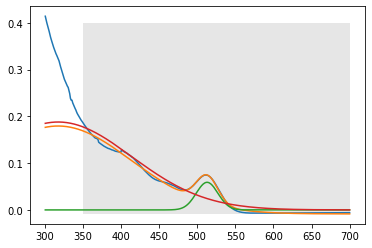

In [5]:
p0=(.05, .2, 500, 300, 5, 100, 0)
popt, pcov = curve_fit(twogauss, uvvisX[:350,0], uvvisY[:350,0], p0=p0)
print(popt)
plt.plot(uvvisX[:,0], uvvisY[:,0])
plt.plot(uvvisX[:,0], twogauss(uvvisX[:,0], *popt))
plt.fill((350,350,700,700), (popt[6],.4, .4, popt[6]), facecolor=(.9,.9,.9))
plt.plot(uvvisX[:,0], gauss(uvvisX[:,0], popt[0], popt[2], popt[4]))
plt.plot(uvvisX[:,0], gauss(uvvisX[:,0], popt[1], popt[3], popt[5]))
plt.savefig("fit with shading.png")

Let's look at the residuals here. I added in the shading to show the region fit. Students have proven to me that you can fit the entire region with basically no residual function if you do a four Gauss fit, but I'm not going to bother with that today.

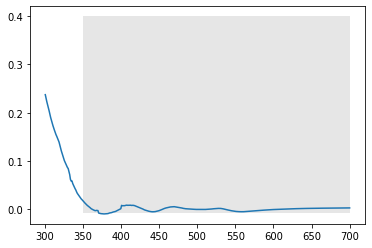

In [7]:
plt.plot(uvvisX[:,0], uvvisY[:,0] - twogauss(uvvisX[:,0], *popt))
plt.fill((350,350,700,700), (popt[6],.4, .4, popt[6]), facecolor=(.9,.9,.9))

Challenges:
Fit them all by iterating over a list?


In [41]:
popt, pcov = curve_fit(fourgauss, xdata, ydata, p0=(*hs, *cs, *ss, b))

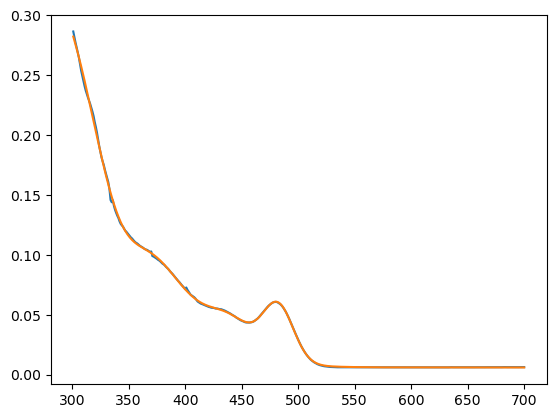

In [45]:
plt.plot(xdata, ydata)
plt.plot(xdata, fourgauss(xdata, *popt))